In [1]:
%matplotlib inline
from nilearn import image, plotting
from matplotlib import pyplot as plt
import numpy as np 
from scipy import stats

/mnt/d/Workspace/master_thesis/neuron/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
img = image.load_img('example.nii')

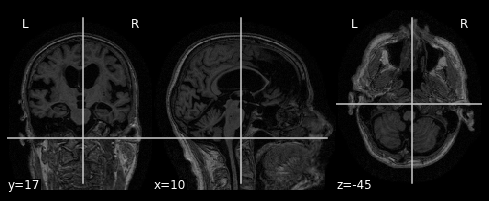

In [3]:
plotting.plot_anat(img)

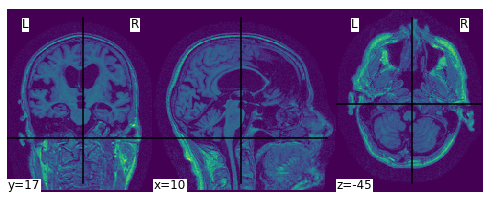

In [4]:
plotting.plot_img(img)

In [5]:
raw_data = img.get_data()

### Draw by layers

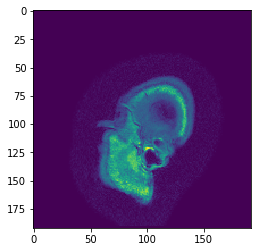

In [6]:
plt.imshow(raw_data[:,:,21])

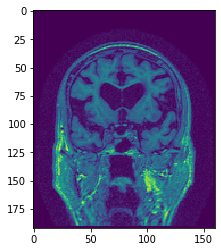

In [7]:
plt.imshow(raw_data[:,80,:])

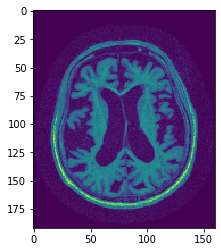

In [8]:
plt.imshow(raw_data[80,:,:])

In [9]:
from os import walk

In [31]:
imgs = {}
for  (dirpath, dirnames, filenames) in walk("data"): 
    for i in filenames: 
        if i.endswith("nii"):
            name = dirpath + "/" + i
            group = dirpath.split("/")[1].split("_")[-1][-1]
            session = dirpath.split("/")[-2]
            date = dirpath.split("/")[-1]
            imgs[name] = {
                "img" : image.smooth_img(name, None), 
                "group" : group,
                "session" : session,
                "date" : date,
                "data" : image.smooth_img(name, None).get_data()
            }

In [32]:
data = [ v["data"] for _, v in imgs.items()]
data = list(filter(lambda x: x.shape == (256, 256, 128, 1), data))

NameError: name 'data' is not defined

In [16]:
imgs['OASIS2/OAS2_0001_MR2/1/123127131/mpr-1.nifti.img']["data"].shape

(256, 256, 128, 1)

In [17]:
import seaborn as sns


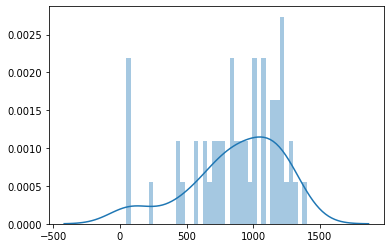

In [18]:
sns.distplot(voxel_dist[80][80][80][0], bins=40)
#stats.entropy(voxel_dist[80][60][60][0])

In [19]:
stats.entropy(voxel_dist[30][0][0][0])

3.842313

In [20]:
np.min(voxel_dist[0][0][0][0])

0.0

In [21]:
voxel_dist.shape

(256, 256, 128, 1, 54)

In [22]:
voxel_dist.shape

(256, 256, 128, 1, 54)

In [24]:
voxel_entropy = np.apply_over_axes(, voxel_dist,[-1] )

In [31]:
stats.entropy([0, 0])

/home/tomas/Desktop/diploma-thesis/neuron/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2614: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=0)


nan

In [12]:
import os
from nilearn import image, plotting
from matplotlib import pyplot as plt
import numpy as np 
from scipy import stats
import logging

In [ ]:
def scale(data, method="MinMax"):
    min_data, max_data = np.min(data), np.max(data)
    

In [27]:
def read_nii_arrays(input_dir, default_shape=(256, 256, 166)):
    # easy option 
    nilearn.image.load_img("*nii", wildcards=True)
    nii_images = []
    for (dirpath, dirnames, filenames) in os.walk(input_dir): 
        for f in filenames: 
            if f.endswith(".nii"):
                logging.info("Read nii file from {}.".format(os.path.join(dirpath, f)))
                img = image.load_img(os.path.join(dirpath, f))
                if img.shape != default_shape: 
                    logging.warning("Expected {} shape but {} found in {}".format(img.shape, default_shape, os.path.join(dirpath, f))) 
                nii_images.append(img.get_data())
    return nii_images

In [14]:
data = read_nii_arrays("data")

In [15]:
def voxel_dist_operations(data, operations=[np.max, np.mean, np.var, np.min, np.median]):
    voxel_dist = np.stack(data, axis=-1)
    img_shape = voxel_dist.shape[:3]
    # apply each operation on each voxel distribution and create result matrices
    return {op.__name__:np.squeeze(np.apply_over_axes(op, voxel_dist,[-1])) for op in operations}

In [16]:
res = voxel_dist_operations(data)

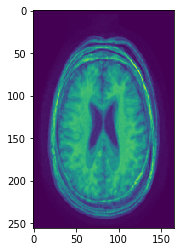

In [17]:
plt.imshow(res['mean'][80,:,:])

In [21]:
img = image.load_img("data/ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319113623975_S13408_I45108.nii")

In [25]:
np.max(data)

4492.3516

In [26]:
image.load_img("data/*nii", wildcards=True)

ValueError: Field of view of image #1 is different from reference FOV.
Reference affine:
array([[ 3.24324856e-08,  2.47045576e-04, -1.20230706e+00,
         9.83685989e+01],
       [-2.47913070e-04, -9.44204921e-01, -3.14576448e-04,
         1.59447998e+02],
       [-9.47527495e-01,  2.47043753e-04,  4.11532190e-08,
         9.67780991e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])
Image affine:
array([[ 3.24417582e-08,  2.47057311e-04, -1.20223554e+00,
         9.70973969e+01],
       [-2.47983989e-04, -9.44249923e-01, -3.14557685e-04,
         1.54604996e+02],
       [-9.47798398e-01,  2.47055566e-04,  4.11507708e-08,
         1.08750999e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])
Reference shape:
(256, 256, 166)
Image shape:
(256, 256, 166, 1)


In [29]:
import nilearn

In [30]:
nilearn.image.clean_img(data, standardize=True)

TypeError: Data given cannot be loaded because it is not compatible with nibabel format:
0.0

In [32]:
from nilearn.input_data import NiftiMasker
masker = NiftiMasker(mask_img=None, standardize=True)
normalized_imgs = masker.fit_transform(data)

TypeError: Data given cannot be loaded because it is not compatible with nibabel format:
0.0

In [33]:
import nibabel

In [34]:
nibabel

<module 'nibabel' from '/mnt/d/Workspace/master_thesis/neuron/lib/python3.6/site-packages/nibabel/__init__.py'>

In [35]:
import nibabel as nib

In [36]:
img = nib.load("data/ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319113623975_S13408_I45108.nii")

array(nan, dtype=float32)

In [51]:
?nib.load

Signature: nib.load(filename, **kwargs)
Docstring:
Load file given filename, guessing at file type

Parameters
----------
filename : string
   specification of file to load
\*\*kwargs : keyword arguments
    Keyword arguments to format-specific load

Returns
-------
img : ``SpatialImage``
   Image of guessed type
File:      /mnt/d/Workspace/master_thesis/neuron/lib/python3.6/site-packages/nibabel/loadsave.py
Type:      function


In [54]:
from sklearn import preprocessing
preprocessing.scale(data)

ValueError: Found array with dim 4. the scale function expected <= 2.